# kNN basic practice

## sklearn.neighbors

docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

examples: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#gallery-examples

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Toy task - only 2 features

In [2]:
classification_problem = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [3]:
def plot_dataset(dataset: (np.ndarray, np.ndarray)):
    colors = ListedColormap(["red", "blue", "yellow"])

    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=dataset[1], cmap=colors, s=100)
    plt.show()

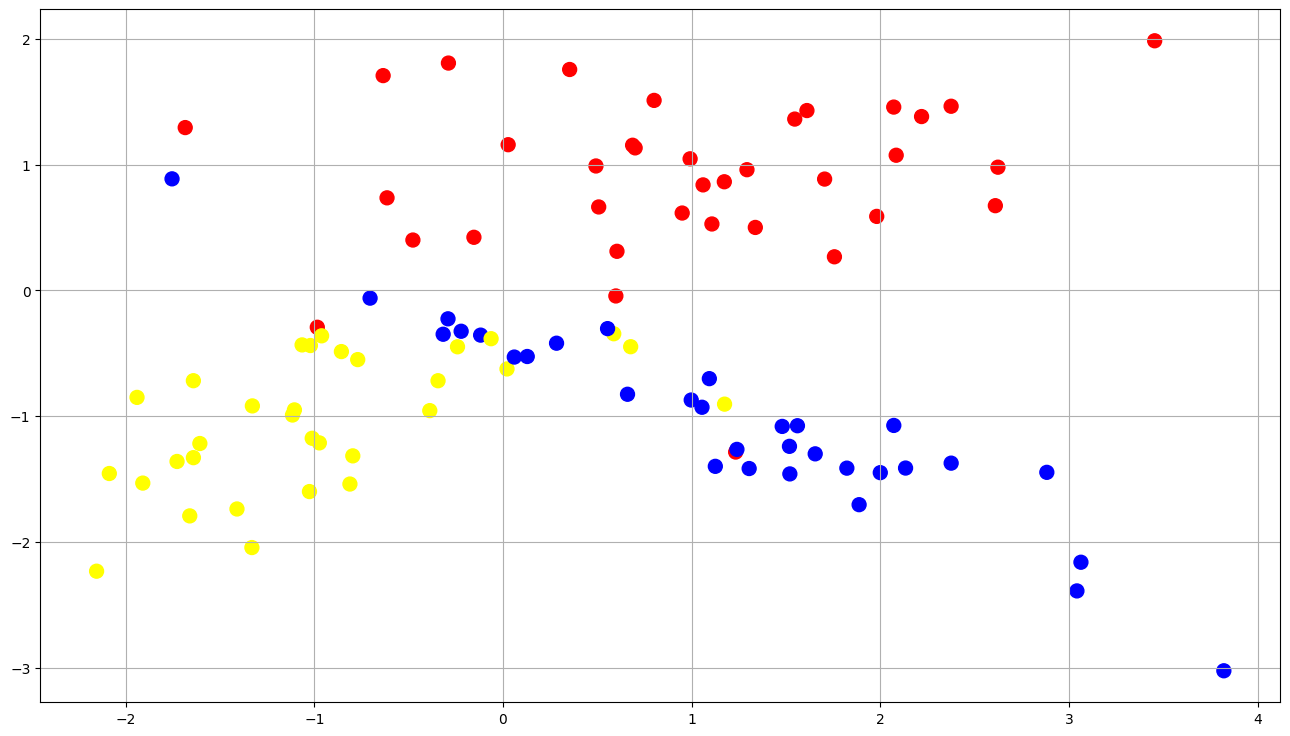

In [4]:
plot_dataset(classification_problem)

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *classification_problem,
    test_size=0.3,
    random_state=1,
)

# Let's build our model!

In [6]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [7]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.9

In [8]:
print(predictions)
print(test_labels)

[0 0 0 1 0 1 1 0 0 0 2 2 2 2 2 1 1 1 1 2 2 0 2 0 0 0 1 1 2 0]
[0 0 0 1 1 1 1 0 0 0 2 2 2 2 2 1 1 0 1 0 2 0 2 0 0 0 1 1 2 0]


### And visualize

In [10]:
def make_meshgrid(
    data: np.ndarray,
    step: float = 0.05,
    border: float = 0.5,
):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [11]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(["red", "blue", "yellow"])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])

    # fit model
    estimator.fit(train_data, train_labels)

    # set figure size
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(estimator)

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = make_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    acc = accuracy_score(train_labels, estimator.predict(train_data))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    acc = accuracy_score(test_labels, estimator.predict(test_data))
    plt.title(f"Test data, accuracy={acc:.2f}")

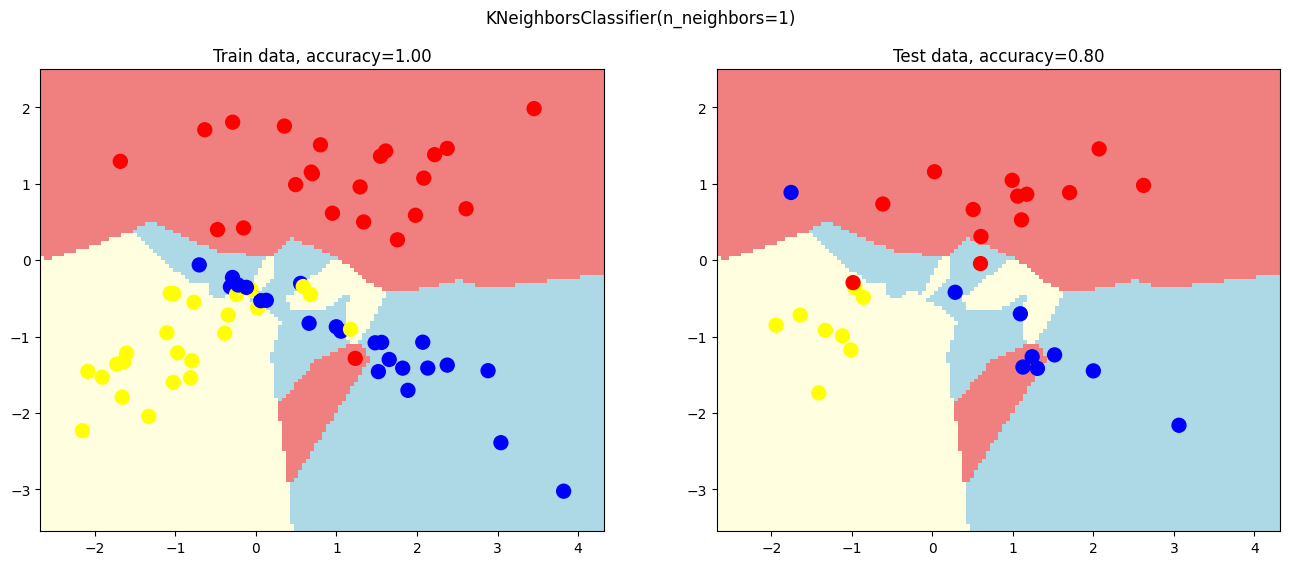

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

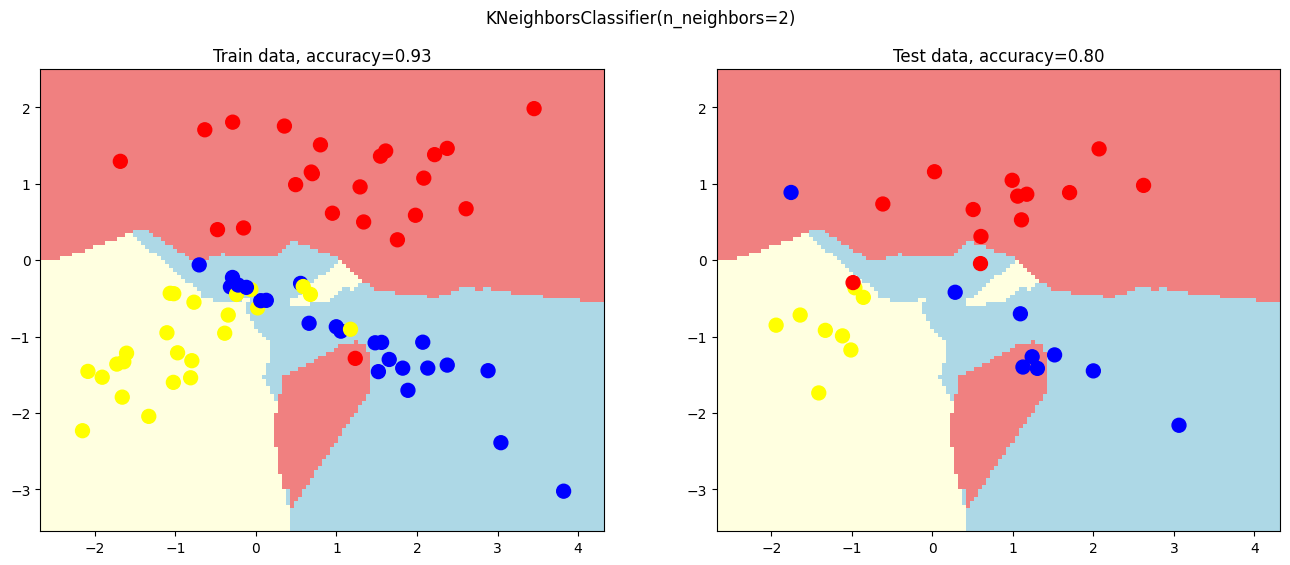

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

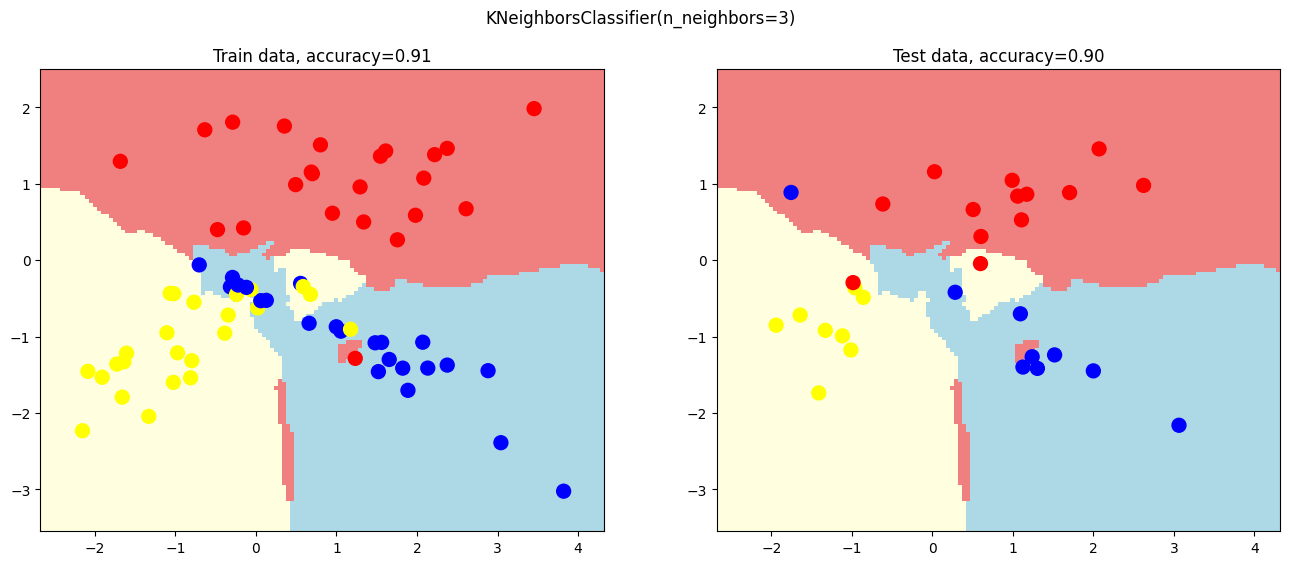

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

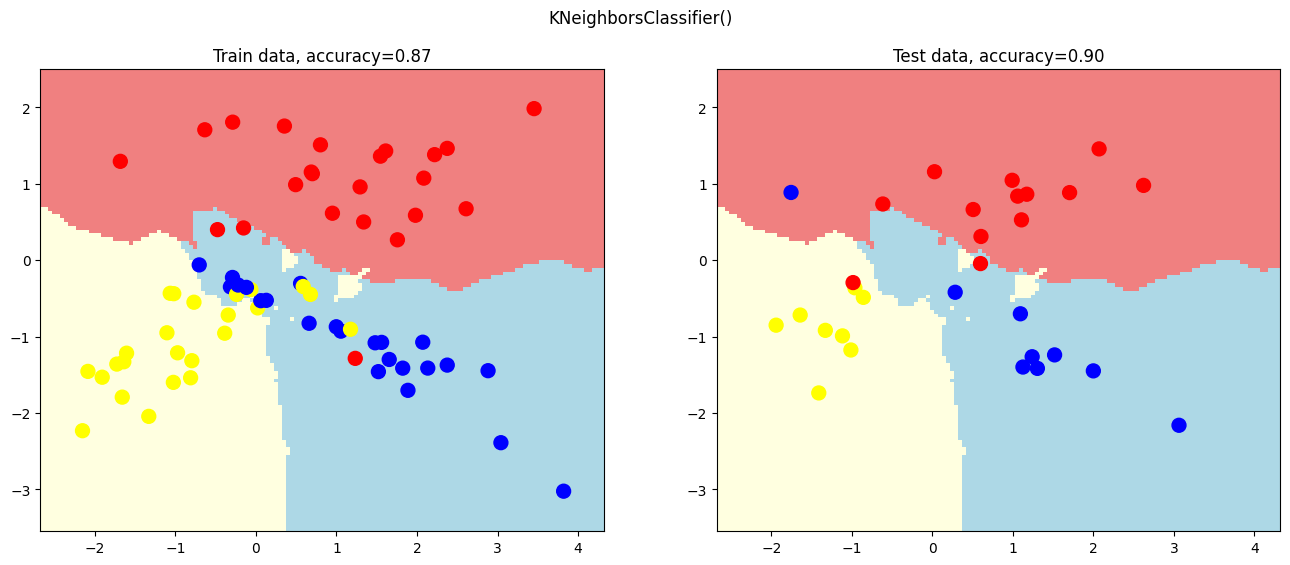

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

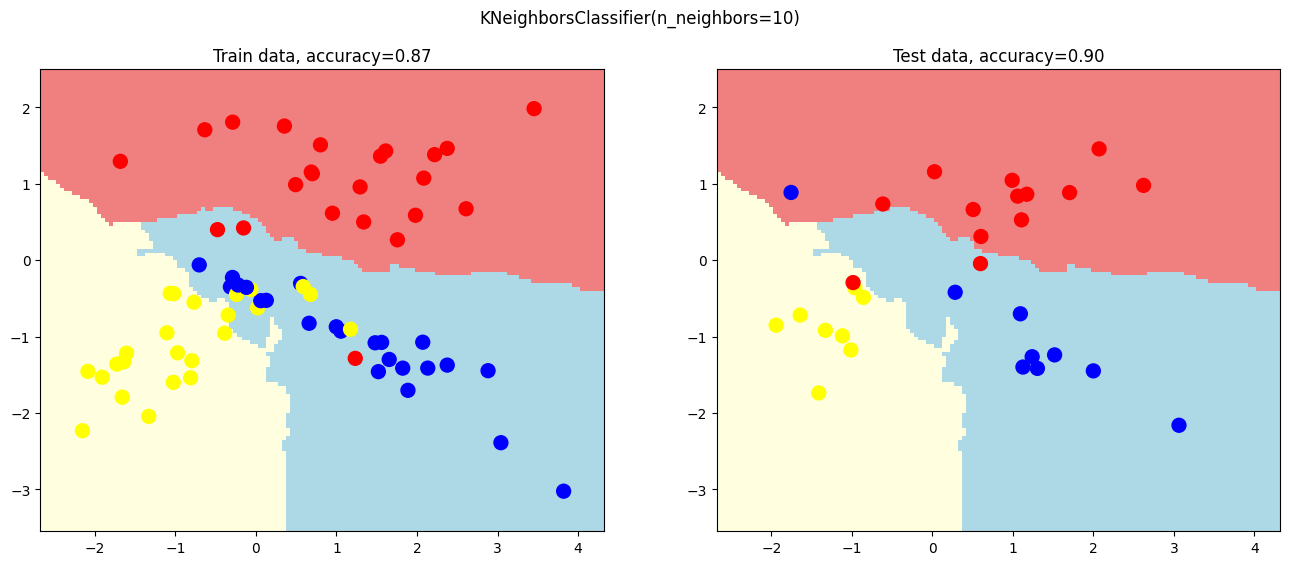

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

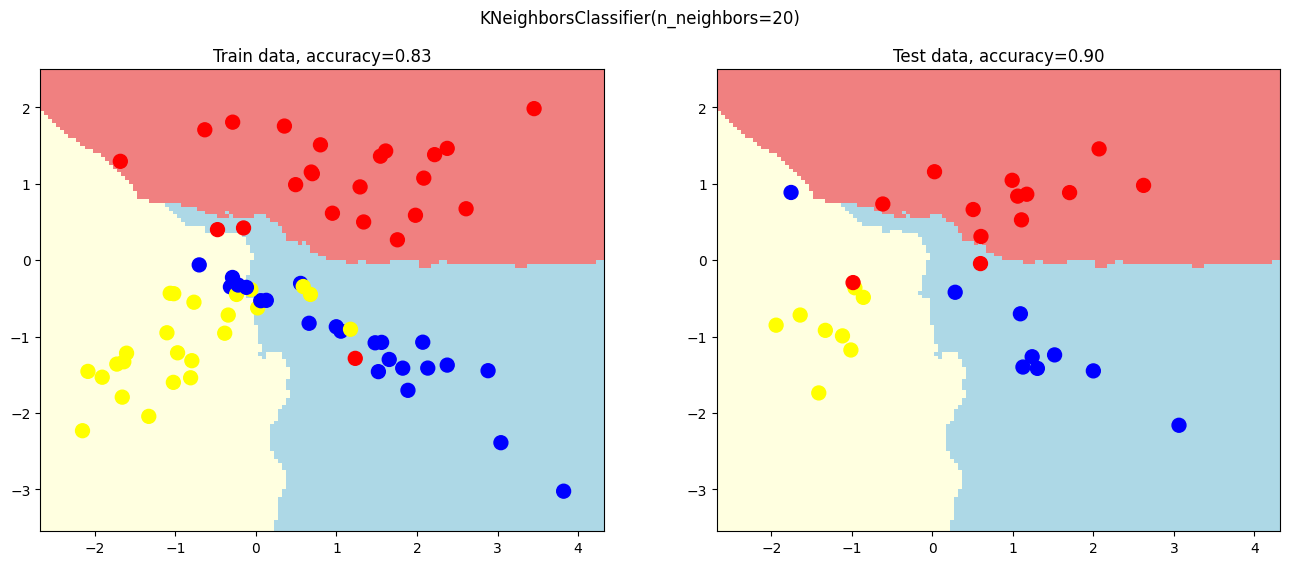

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

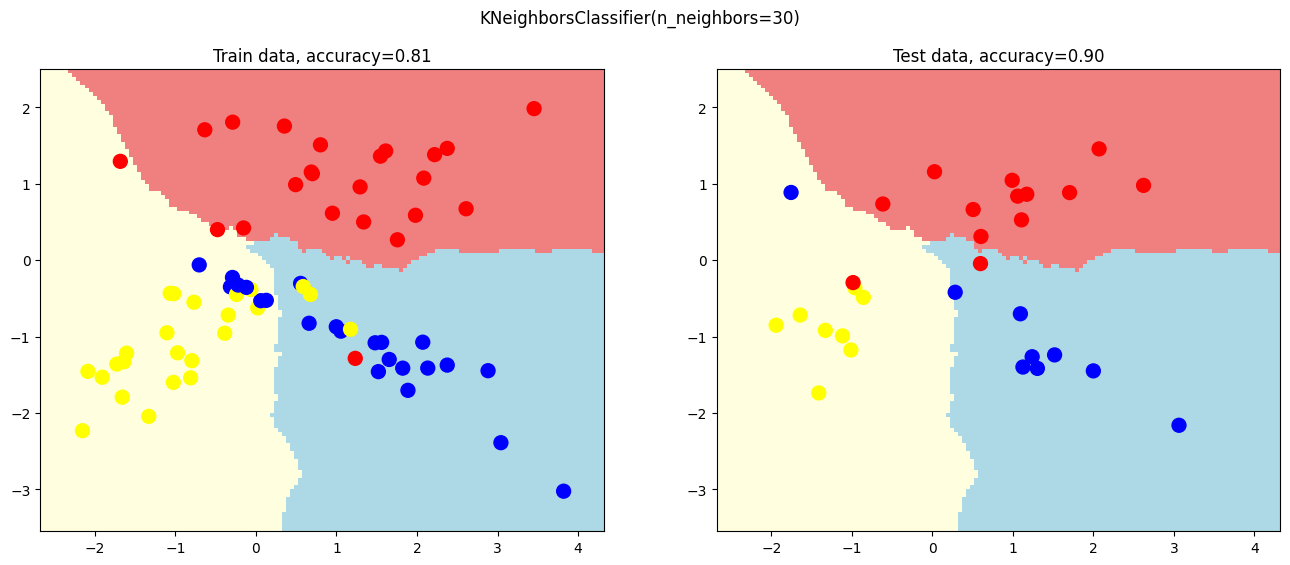

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

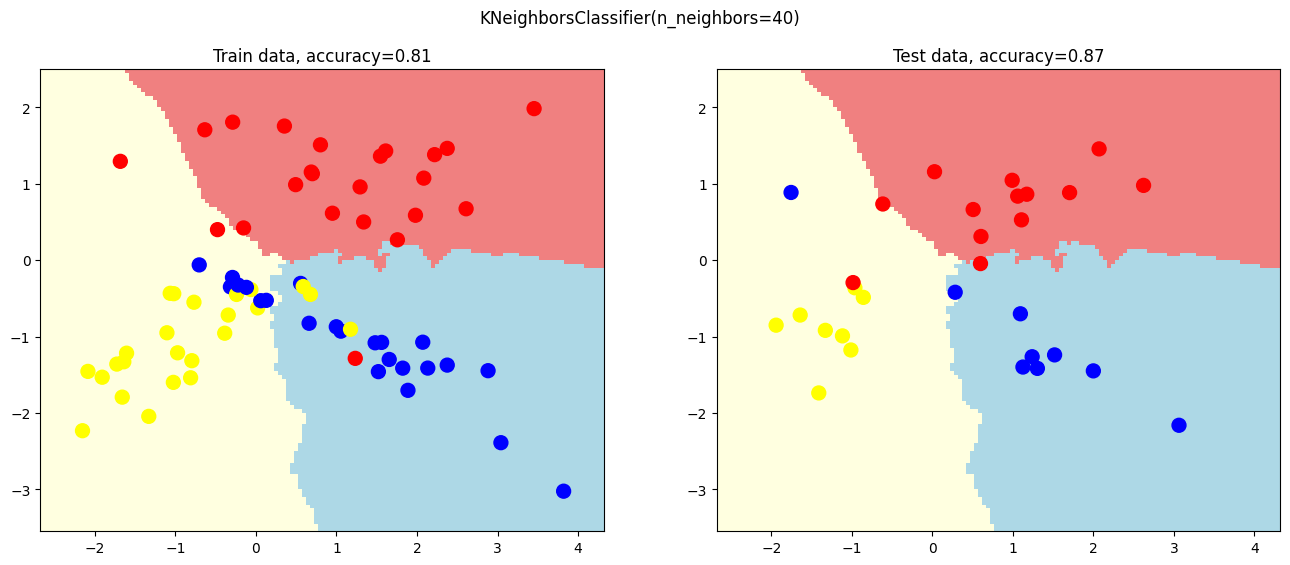

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [19]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

In [21]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [22]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.6

## Or not so good...

In [23]:
def train_knn_classifier(dimensions, n_classes):
    scores = []

    for dim in dimensions:
        problem = datasets.make_classification(
            n_samples=1000,
            n_features=dim,
            n_informative=dim // 2,
            n_classes=n_classes,
            n_redundant=dim // 2,
            n_clusters_per_class=1,
            random_state=42,
        )

        train_data, test_data, train_labels, test_labels = train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(12, 7))
    plt.plot(dimensions, scores)
    plt.grid()
    plt.show()

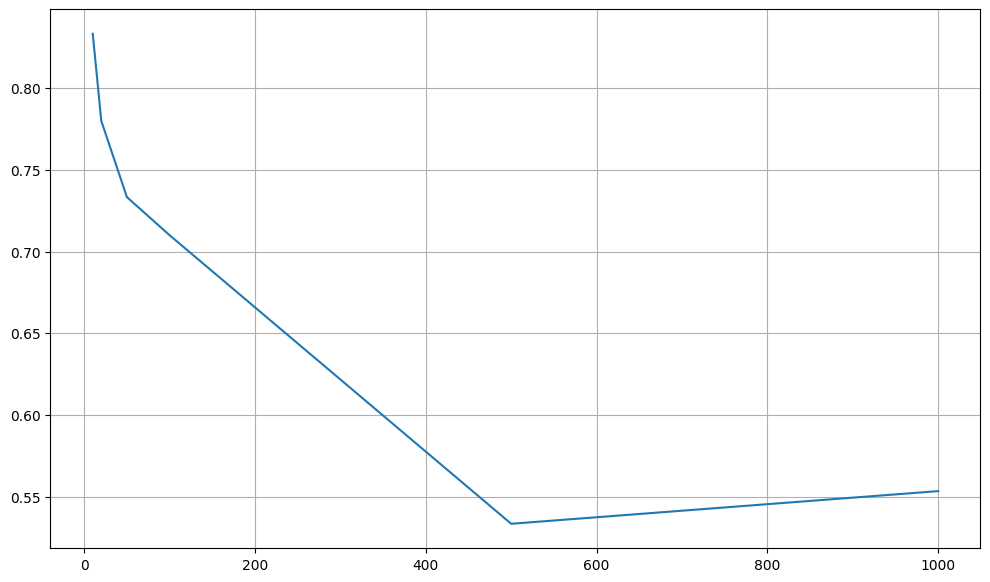

In [24]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [30]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -o ../datasets/wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10782    0 10782    0     0  17051      0 --:--:-- --:--:-- --:--:-- 17033


In [32]:
dataset = pd.read_csv("../datasets/wine.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
X = dataset.drop(0, axis=1).to_numpy()
y = dataset[0].to_numpy()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)

(160, 13)
(18, 13)


In [68]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.7222222222222222

# Bonus area

**Those who gets accuracy of at least 0.85 recieves bonus (1.0 max)**

Deadline: Day02 practice session

In [74]:
for n in range(1, X_train.shape[0]):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # print(accuracy)
    if accuracy >= 0.85:
        print(n, accuracy)

# let's scale all data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for n in range(1, X_train.shape[0]):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train_scaled, y_train)

    predictions = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    # print(accuracy)
    if accuracy >= 0.85:
        print(n, accuracy)


1 0.9444444444444444
2 0.9444444444444444
3 0.9444444444444444
4 0.9444444444444444
5 0.9444444444444444
6 0.9444444444444444
7 0.9444444444444444
8 0.9444444444444444
9 0.9444444444444444
10 0.9444444444444444
11 0.9444444444444444
12 0.9444444444444444
13 0.9444444444444444
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 0.9444444444444444
22 1.0
23 0.9444444444444444
24 0.9444444444444444
25 0.9444444444444444
26 0.9444444444444444
27 0.9444444444444444
28 0.9444444444444444
29 0.9444444444444444
30 0.9444444444444444
31 0.9444444444444444
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 0.9444444444444444
45 0.9444444444444444
46 0.9444444444444444
47 0.9444444444444444
48 0.9444444444444444
49 0.9444444444444444
50 0.9444444444444444
51 0.9444444444444444
52 0.9444444444444444
53 0.9444444444444444
54 0.9444444444444444
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72